In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_validate, ShuffleSplit, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, f1_score, precision_recall_fscore_support 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
sys.path.append('..')

C:\Users\mraja\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
#not plotted roc curves since i had to run the models as all the variables got overwritten as everytime used the same variable
#and running each model taking so much time as we oversampled
#and when running the models again I will try to run ensemble model  


data_path = os.path.join(os.getcwd(), 'cup98lrn', 'CharityContribution_Learn.csv')
bristol = pd.read_csv(data_path)
bristol.shape
bristol.head()

,Origin_Year,Zipcode,Mail_Code,Do_Not_Exchange_Flag,In_House_File_Flag,P3_File_Flag,Planned_Giving_File_Flag,Sweepstakes_File_Flag,Neighborhood_Status.1,Demographic_Cluster,...,Frequecy_Code_For_Mdmaud__1,Frequecy_Code_For_Mdmaud__2,Frequecy_Code_For_Mdmaud__5,Donation_Amount_Code_For_Mdmaud__CoreDoner_100plus,Donation_Amount_Code_For_Mdmaud__LessDonor,Donation_Amount_Code_For_Mdmaud__MajorDoner_500plus,Donation_Amount_Code_For_Mdmaud__TopDonor_1000plus,Control_Number_(Unique_Record_Identifier),Target_B,Target_D
0,1924,56475,0,0,0,0,0,0,3,51,...,0,0,0,0,0,0,0,85548,0,0.0
1,1924,93527,0,0,0,0,0,0,1,35,...,0,0,0,0,0,0,0,160963,0,0.0
2,1924,55112,0,0,0,0,0,0,2,17,...,0,0,0,0,0,0,0,84035,0,0.0
3,1923,55066,0,0,0,0,0,0,2,36,...,0,0,0,0,0,0,0,82335,0,0.0
4,1925,33332,0,0,0,0,0,0,1,35,...,0,0,0,0,0,0,0,39327,0,0.0


In [3]:
data_path = os.path.join(os.getcwd(), 'cup98val', 'Charity_TEST.csv')
bristol_test = pd.read_csv(data_path)
bristol_test.shape
bristol_test.head()

,Origin_Year,Zipcode,Mail_Code,Do_Not_Exchange_Flag,In_House_File_Flag,P3_File_Flag,Planned_Giving_File_Flag,Sweepstakes_File_Flag,Neighborhood_Status.1,Demographic_Cluster,...,Frequecy_Code_For_Mdmaud__1,Frequecy_Code_For_Mdmaud__2,Frequecy_Code_For_Mdmaud__5,Donation_Amount_Code_For_Mdmaud__CoreDoner_100plus,Donation_Amount_Code_For_Mdmaud__LessDonor,Donation_Amount_Code_For_Mdmaud__MajorDoner_500plus,Donation_Amount_Code_For_Mdmaud__TopDonor_1000plus,Control_Number_(Unique_Record_Identifier),Target_B,Target_D
0,1925,98498,0,0,0,0,0,0,1,13,...,0,0,0,0,0,0,0,182234,0,0.0
1,1923,92868,0,0,0,0,0,0,2,7,...,0,0,0,0,0,0,0,157437,0,0.0
2,1924,33021,0,0,0,0,0,0,1,13,...,0,0,0,0,0,0,0,36709,0,0.0
3,1925,29154,0,0,0,0,0,0,3,33,...,0,0,0,0,0,0,0,32435,0,0.0
4,1924,35601,0,0,0,0,0,0,2,27,...,0,0,0,0,0,0,0,47772,0,0.0


In [4]:
#summarsing the data set
print("-------Info-------------\n")
print(bristol.info())
print("\n----------Describe---------")
print(bristol.describe())
print("------- Test Info-------------\n")
print(bristol_test.info())
print("\n----------Test Describe---------")
print(bristol_test.describe())

-------Info-------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 1387 entries, Origin_Year to Target_D
dtypes: float64(32), int64(1355)
memory usage: 1009.6 MB
None

----------Describe---------
        Origin_Year       Zipcode     Mail_Code  Do_Not_Exchange_Flag  \
count  95412.000000  95412.000000  95412.000000          95412.000000   
mean    1924.592137  64270.904488      0.014663              0.003354   
std        1.074628  23961.245029      0.120199              0.057816   
min     1922.000000    801.000000      0.000000              0.000000   
25%     1924.000000  40502.000000      0.000000              0.000000   
50%     1925.000000  63105.500000      0.000000              0.000000   
75%     1926.000000  90008.000000      0.000000              0.000000   
max     1926.000000  99950.000000      1.000000              1.000000   

       In_House_File_Flag  P3_File_Flag  Planned_Giving_File_Flag  \
count        95412.000000  95412.

In [5]:
Donated = bristol_test[bristol_test['Target_B'] == 1].Target_B
not_donated = bristol_test[bristol_test['Target_B'] == 0].Target_B
print("Test Doanted :----",len(Donated)," out of ",bristol_test.shape[0])
print("test NOT Doanted :----",len(not_donated))

Test Doanted :---- 4390  out of  86526
test NOT Doanted :---- 82136


In [6]:
Donated = bristol[bristol['Target_B'] == 1].Target_B
not_donated = bristol[bristol['Target_B'] == 0].Target_B
print("Doanted :----",len(Donated)," out of ",bristol.shape[0])
print("NOT Doanted :----",len(not_donated))

Doanted :---- 4843  out of  95412
NOT Doanted :---- 90569


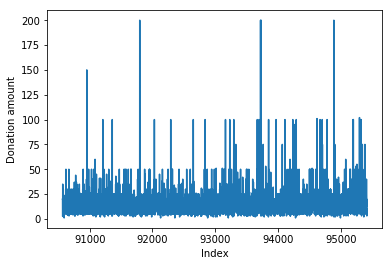

200.0 1.0


In [7]:
donation_amount = bristol[bristol['Target_D'] > 0.0].Target_D
plt.plot(donation_amount)
plt.xlabel("Index")
plt.ylabel("Donation amount")
plt.show()
print(max(donation_amount),min(donation_amount))

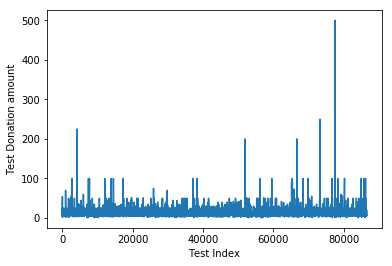

500.0 0.32


In [8]:
donation_amount = bristol_test[bristol_test['Target_D'] > 0.0].Target_D
plt.plot(donation_amount)
plt.xlabel("Test Index")
plt.ylabel("Test Donation amount")
plt.show()
print(max(donation_amount),min(donation_amount))

In [ ]:
#finding correlation between target variables and other factors
target_b_corr = bristol.corr()["Target_B"].copy()
print(len(target_b_corr))
postive_corr = target_b_corr.loc[target_b_corr > 0.0]
negative_corr = target_b_corr.loc[target_b_corr < 0.0]
neutral_corr = target_b_corr.loc[target_b_corr == 0.0]

Index(['Origin_Year', 'Mail_Code', 'Do_Not_Exchange_Flag',
       'Sweepstakes_File_Flag', 'Neighborhood_Status.1', 'Demographic_Cluster',
       'Number_Of_Children_Calcutated', 'Number_Of_Children',
       'Buy_Collectables', 'Do_It_Yourself_Pubs',
       ...
       'Date_Of_Second_Gift__9607', 'Date_Of_Second_Gift__9608',
       'Date_Of_Second_Gift__9610', 'Date_Of_Second_Gift__9612',
       'Date_Of_Second_Gift__9702', 'Recency_Code_For_Mdmaud__DormantDonor',
       'Recency_Code_For_Mdmaud__LapsedDonor', 'Frequecy_Code_For_Mdmaud__5',
       'Donation_Amount_Code_For_Mdmaud__MajorDoner_500plus',
       'Donation_Amount_Code_For_Mdmaud__TopDonor_1000plus'],
      dtype='object', length=579)
Index(['Zipcode', 'In_House_File_Flag', 'P3_File_Flag',
       'Planned_Giving_File_Flag', 'Overlay_Age', 'Calculated_Age',
       'Home_Owner_Flag', 'Household_Income', 'Wealth_Rating',
       'Num_Mail_Order_Response',
       ...
       'Date_Of_Second_Gift__9701', 'Recency_Code_For_Mdmaud__C

ValueError: 
15,000_-_
         ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found end of text  (at char 9), (line:1, col:10)

ValueError: 
15,000_-_
         ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found end of text  (at char 9), (line:1, col:10)

<Figure size 1440x1440 with 1 Axes>

ValueError: 
Major_($$)_Donor_Flag
       ^
Expected end of text, found '$'  (at char 7), (line:1, col:8)

<Figure size 1440x1440 with 1 Axes>

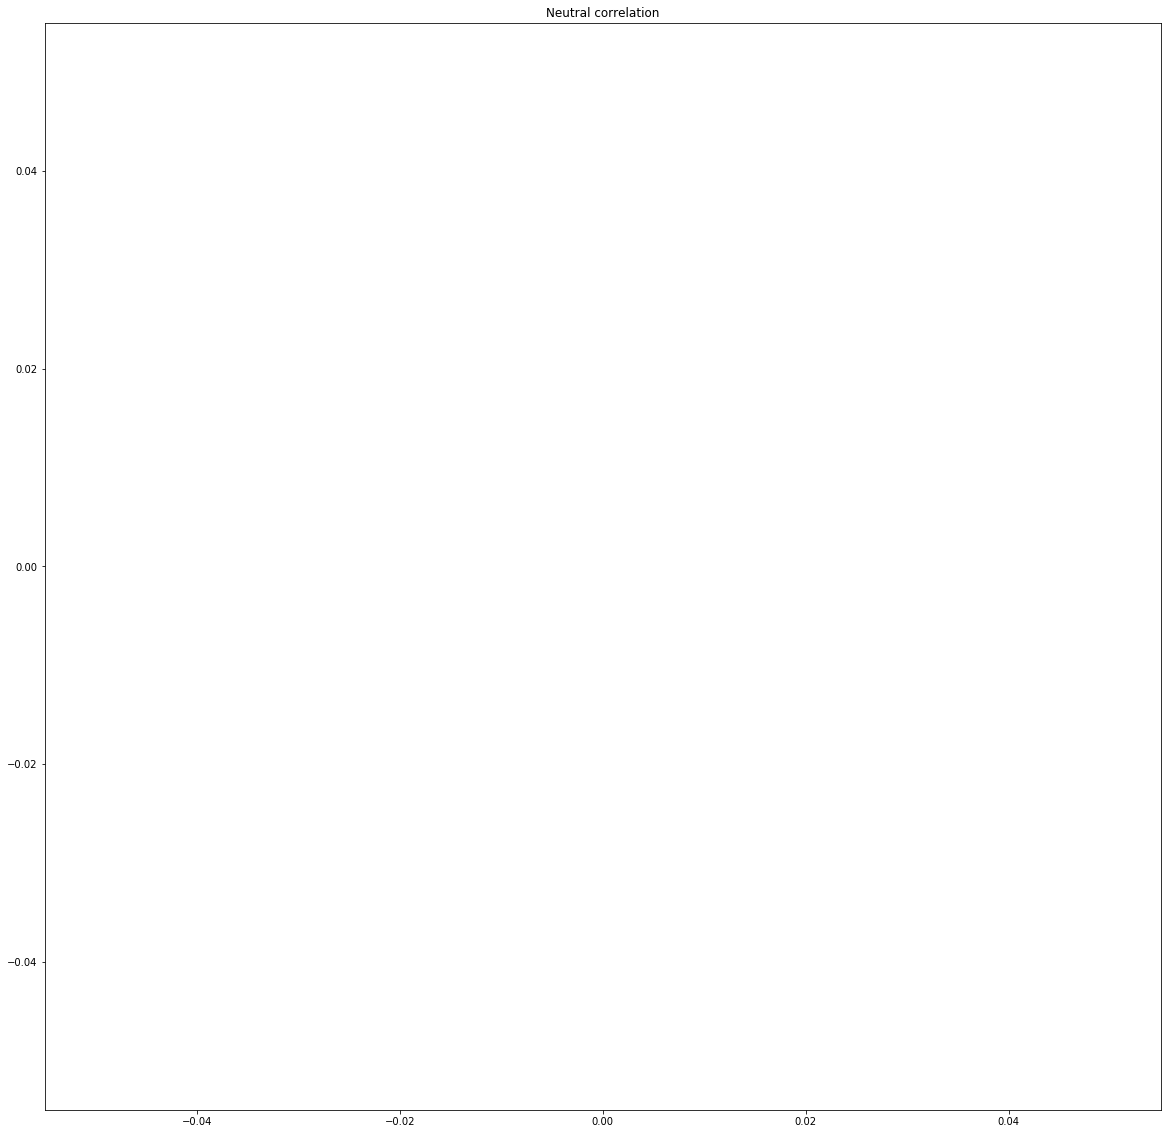

In [30]:
np.set_printoptions(threshold=sys.maxsize)
plt.figure(1, figsize=((20,20)))
plt.plot(negative_corr)
plt.title("Negative correlation")
print(pd.DataFrame(negative_corr).index)
plt.figure(2, figsize=((20,20)))
plt.plot(postive_corr)
plt.title("Positive correlation")
print(pd.DataFrame(postive_corr).index)
plt.figure(3, figsize=((20,20)))
plt.plot(neutral_corr)
plt.title("Neutral correlation")
print(pd.DataFrame(neutral_corr).index)

In [31]:
print(pd.DataFrame(postive_corr).sort_values('Target_B'))

                                                        Target_B
Date_The_Gift_Was_Received_For_95Cc__9503           5.402108e-07
Percent_Puerto_Rican                                3.716082e-06
Date_The_Gift_Was_Received_For_96Xk__9601           9.207201e-06
Major_($$)_Donor_Flag                               6.625607e-05
Date_The_Gift_Was_Received_For_94Nk__9502           6.818325e-05
Date_Of_First_Gift__9204                            9.393209e-05
Date_The_Gift_Was_Received_For_95Wl__9507           1.204087e-04
Date_The_Gift_Was_Received_For_95Tk__9504           1.204087e-04
Donor_Title__GOVER                                  1.204087e-04
Number_Of_Months_Between_First_And_Second_Gift      1.355296e-04
Date_Of_First_Gift__8702                            1.460882e-04
Date_Of_First_Gift__9502                            1.644309e-04
State__Pennsylvania                                 1.703005e-04
Date_Of_First_Gift__8712                            1.942293e-04
Childern_4-7__Child_Femal

In [32]:
print(pd.DataFrame(negative_corr).sort_values('Target_B'))

                                                  Target_B
Donation_Amount_Code_For_Rfa_2                   -0.070026
Donor_97Nk_Price_Of_Gift                         -0.070026
Donor_96Nk_Price_Of_Gift                         -0.053168
Donor_96Tk_Price_Of_Gift                         -0.050566
Donor_96Ll_Price_Of_Gift                         -0.043361
Dollar_Amount_Of_Most_Recent_Gift                -0.035526
Average_Dollar_Amount_Of_Gifts_To_Date           -0.032444
Donor_96G4_Price_Of_Gift                         -0.032181
Dollar_Amount_Of_Smallest_Gift_To_Date           -0.031008
Origin_Year                                      -0.031001
Date_Associated_With_The_Largest_Gift_To_Date    -0.026461
Donor_96Gk_Price_Of_Gift                         -0.023312
Percent_Female_Householder_W/_Child              -0.021762
Neighborhood_Status.1                            -0.020703
Percent_Single_Parent_Households                 -0.020671
Date_The_96G1_Promotion_Was_Mailed__9601         -0.0203

In [33]:
target_d_corr = bristol.corr()["Target_D"].copy()

In [34]:
print(len(target_d_corr))
postive_d_corr = target_d_corr.loc[target_d_corr > 0.0]
negative_d_corr = target_d_corr.loc[target_d_corr < 0.0]
neutral_d_corr = target_d_corr.loc[target_d_corr == 0.0]

1387


Text(0.5,1,'Neutral correlation')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000021C78B66048> (for post_execute):


ValueError: 
15,000_-_
         ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found end of text  (at char 9), (line:1, col:10)

ValueError: 
15,000_-_
         ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found end of text  (at char 9), (line:1, col:10)

<Figure size 1440x1440 with 1 Axes>

ValueError: 
Major_($$)_Donor_Flag
       ^
Expected end of text, found '$'  (at char 7), (line:1, col:8)

<Figure size 1440x1440 with 1 Axes>

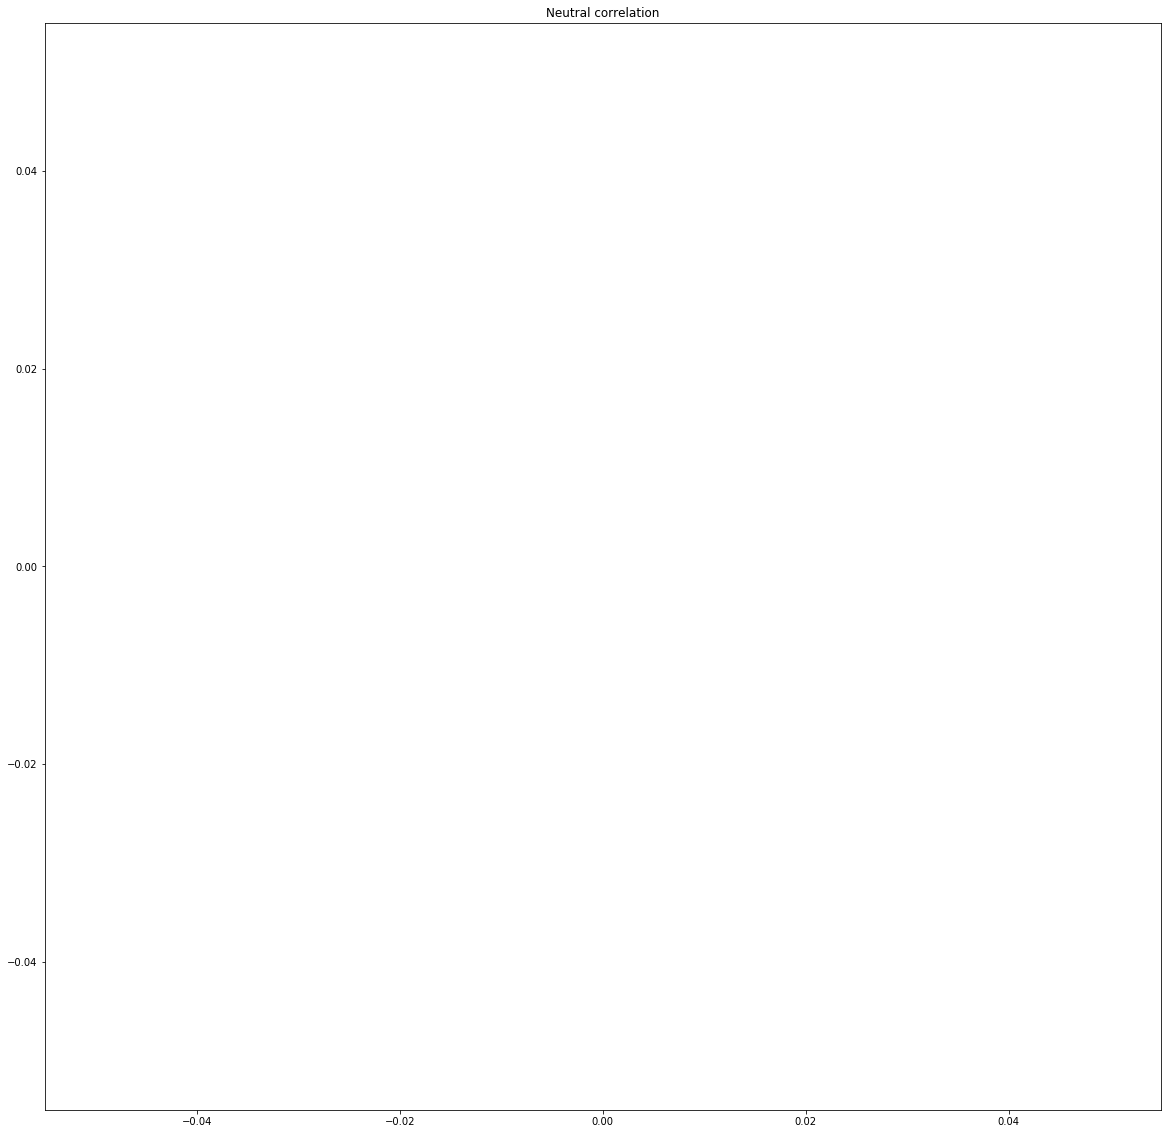

In [13]:
np.set_printoptions(threshold=sys.maxsize)
plt.figure(1, figsize=((20,20)))
plt.plot(negative_d_corr)
plt.title("Negative correlation")
#print(pd.DataFrame(negative_corr).index)
plt.figure(2, figsize=((20,20)))
plt.plot(postive_d_corr)
plt.title("Positive correlation")
#print(pd.DataFrame(postive_corr).index)
plt.figure(3, figsize=((20,20)))
plt.plot(neutral_d_corr)
plt.title("Neutral correlation")
#print(pd.DataFrame(neutral_corr).index)

In [14]:
print("positive",pd.DataFrame(postive_d_corr).sort_values('Target_D'))   #### target b and target d are highly correlated
print("Negative",pd.DataFrame(negative_d_corr).sort_values('Target_D'))

positive                                                     Target_D
Date_The_Gift_Was_Received_For_95Ll__07/10/1925     0.000034
Dollar_Amount_Of_The_Gift_For_96Wl                  0.000040
Percent_Detached_Single_Unit_Structure              0.000059
Date_The_Gift_Was_Received_For_95Tk__08/01/1926     0.000065
EPVA/PVA_Northeastern_US__PVA_State                 0.000071
Date_Of_First_Gift__15/04/1923                      0.000072
Donor_95X2_Status                                   0.000086
Percent_Males_In_Active_Military_Service            0.000101
Date_The_Gift_Was_Received_For_94Nk__26/06/1925     0.000102
Date_Of_First_Gift__15/01/1926                      0.000143
Children_0-3__Child_Female                          0.000145
Date_Of_First_Gift__10/01/1926                      0.000168
State__Nevada                                       0.000178
Date_The_Gift_Was_Received_For_95Gk__07/01/1926     0.000190
Date_Of_Second_Gift__13/02/1924                     0.000201
Date_Of_Second_

In [13]:
#bristol -original
#bristol_removedD -removed targetD
#bristol_test -original test dataset
unwanted_cols = []
bristol_removedD = bristol.drop('Target_D',axis=1)
bristol_dat = bristol_removedD.var()
unwanted_cols.extend(bristol_dat.index[bristol_dat < 0.001])
#remove columns which are mostly sparse i.e columns that contain less than 1 % of total data
unwanted_cols.extend(bristol.columns[bristol.count() < int(bristol.shape[0] * 0.01)])
bristol_preprocessed = bristol.drop(unwanted_cols,axis=1)
#bristol_test_preprocessed = bristol.drop(unwanted_cols,axis=1)
#imputation of mean values for int and float and for object mode values
for col in bristol_preprocessed:
    if len(bristol_preprocessed.loc[bristol_preprocessed[col].isna()]) != 0:
        if str(bristol_preprocessed[col].dtypes) == 'int64' or str(bristol_preprocessed[col].dtypes) == 'float64':
            bristol_preprocessed[col].fillna(bristol_preprocessed[col].mean(skipna=True),inplace=True)
        elif str(bristol_preprocessed[col].dtypes) == 'object':
            bristol_preprocessed[col].fillna(bristol_preprocessed[col].mode().iloc[0],inplace=True)
print(unwanted_cols)

['Donor_97Nk_Status', 'Donor_Status_1997', 'Donor_Title__ARMY', 'Donor_Title__GOVER', 'Donor_Title__RELIGIOUS', 'State__0', 'State__Armed_Forces_Africa', 'State__Armed_Forces_Americas', 'State__Armed_Forces_Pacific', 'State__Connecticut', 'State__Delaware', 'State__District_of_Columbia', 'State__Maine', 'State__Maryland', 'State__Massachusetts', 'State__New_Hampshire', 'State__New_Jersey', 'State__New_York', 'State__Ohio', 'State__Pennsylvania', 'State__Rhode_Island', 'State__Vermont', 'State__Virginia', 'State__West_Virginia', 'DOB_Year__1900', 'Recency Of Giving__DormantDonor', 'Recency Of Giving__InactiveDonor', 'Recency Of Giving__LapsedDonor', 'Frequency Of Giving__2to4_gifts', 'Frequency Of Giving__5+_gifts', 'Amount Of Giving__LessDonor', 'Amount Of Giving__MajorDoner_5+', 'Amount Of Giving__TopDonor_1+', 'EPVA/PVA_Northeastern_US__EPVA_StateVA_State_Northeastern_US', 'Age_Flag__I', 'Children_0-3__Child_BothGenders', 'Date_The_97Nk_Promotion_Was_Mailed__9704', 'Date_The_97Nk_Pro

In [28]:
print(len(unwanted_cols))

465


In [31]:
#feature selection based on corelation i.e higher correlated variables shows most impact on the data by balancing the dataset.
#so postive and correlated values which are higher than 0.01 are considered
#to do that categorical values are changed to ordinal
bristol_preprocessed.apply(np.random.permutation)        #shuffling data to ensure data has no predefined order
positive_labels = bristol_preprocessed['Target_B'] == 1  #postive labels
positive_examples = bristol_preprocessed[positive_labels] #positive rows
negative_examples = bristol_preprocessed[bristol_preprocessed['Target_B'] == 0][:sum(positive_labels)] #equal number of negative rows for balancing
subset_data = positive_examples.append(negative_examples,ignore_index=True)
#changed_data = pd.get_dummies(subset_data) #changing categorical values
changed_data_corr = subset_data.corr()['Target_B'].copy() #coorelation
#print(changed_data.describe())

In [32]:
positive_correlation = changed_data_corr.loc[changed_data_corr >= 0.01].index
negative_correlation = changed_data_corr.loc[changed_data_corr <=-0.01].index
print(pd.DataFrame(changed_data_corr).sort_values('Target_B'))
imporatant_features = list(set(positive_correlation.append(negative_correlation)))
print(len(imporatant_features))

                                                    Target_B
Percent_2_Parent_Earner_Families                   -0.032528
Date_Of_Second_Gift__9408                          -0.031926
Date_Of_First_Gift__9602                           -0.029463
Date_The_95Nk_Promotion_Was_Mailed__9506           -0.028358
Number_Of_Lifetime_Gifts_To_Card_Promotions_To_... -0.027610
Percent_Adults_25+_W/_Some_High_School             -0.026143
Date_The_Gift_Was_Received_For_95Gk__9505          -0.025932
Date_The_Gift_Was_Received_For_95G1__9506          -0.024920
Percent_Multi_(2+)_Unit_Structures                 -0.023575
Donor_95Ll_Status                                  -0.023547
Date_The_Gift_Was_Received_For_96Gk__9601          -0.022696
Date_The_Gift_Was_Received_For_95Tk__9508          -0.021740
Date_The_Gift_Was_Received_For_95Cc__9501          -0.021371
State__Arizona                                     -0.021340
Culinary_Pubs                                      -0.020879
Opportunity_Seekers_Pubs

In [33]:
#getting data from important features
bristol_changeddata = bristol_preprocessed[imporatant_features]
#bristol_changeddata = pd.get_dummies(bristol_preprocessed)[imporatant_features]
print(bristol_changeddata.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets

#upsampling
from sklearn.utils import resample
not_donated = bristol_changeddata[bristol_changeddata.Target_B==0]
donated = bristol_changeddata[bristol_changeddata.Target_B==1]

# upsample minority
donated_upsampled = resample(donated,
                          replace=True, # sample with replacement
                          n_samples=len(not_donated), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
bristol_changeddata = pd.concat([not_donated, donated_upsampled])

X_traindata = bristol_changeddata.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_traindata = bristol_changeddata['Target_B']
print(bristol_changeddata.shape)

(95412, 294)
(181138, 294)


In [34]:
bristol_test_removedD = bristol_test[imporatant_features]
print(bristol_test_removedD.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets
X_testdata = bristol_test_removedD.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_testdata = bristol_test_removedD['Target_B']

(86526, 294)


In [38]:
for col in X_testdata:
    if len(X_testdata.loc[X_testdata[col].isna()]) != 0:
        X_testdata[col].fillna(X_testdata[col].mode().iloc[0],inplace=True)
print(X_traindata.shape)

(181138, 293)


In [35]:
#logistic regression using penalities
cspace = np.logspace(-4,5,num=10) #from 10^-4 to 10^5 and 19 values in between
np_arrayaccval = []
np_arrayf1val = []
for c in range(len(cspace)):
    lr = LogisticRegression(max_iter = 200,C=cspace[c]) 
    X_train, X_test, y_train, y_test = train_test_split(X_traindata, y_traindata, test_size=0.25)
    lr.fit(X_train,y_train)
    y_skfpredict = lr.predict(X_test)
    y_skfpredict1 = lr.predict(X_train)
    #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
    np_arrayaccval.append(accuracy_score(y_test,y_skfpredict))#accuracy
    np_arrayf1val.append(f1_score(y_test,y_skfpredict))
    print(np_arrayf1val[c],np_arrayaccval[c])

0.5389556983128458 0.541989621287402
0.5412595855038118 0.5468919068124103
0.5534524126899493 0.5561444186816826
0.5509769094138544 0.5534062051451916
0.5526796453869115 0.5565419012918185
0.5539475441955738 0.5576018549188473
0.5543815757142537 0.5594788561333774
0.5562632696390659 0.5569393839019543
0.5539924883881148 0.5568289720658055
0.5492394630452748 0.5543557469360716


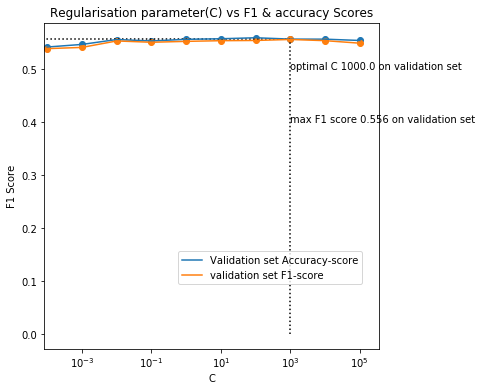

1000.0 0.5562632696390659


In [36]:
#graph representaion
f1train_mean = np_arrayaccval #mean for each reguralisation parameter
f1val_mean = np_arrayf1val
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plt.xscale('log')
plt.plot(cspace,f1train_mean,label='Validation set Accuracy-score')
plt.scatter(cspace,f1train_mean)
plt.plot(cspace,f1val_mean,label='validation set F1-score')
plt.scatter(cspace,f1val_mean)
plt.legend(bbox_to_anchor=(0.4, 0.3), loc='upper left', borderaxespad=0.)
plt.xlim(-5.5,)
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('Regularisation parameter(C) vs F1 & accuracy Scores')
max_mean = max(list(f1val_mean))
index = list(f1val_mean).index(max_mean)
c_value = list(cspace)[index]
plt.vlines(c_value,0,max_mean,linestyle=":")
plt.hlines(max_mean,0,c_value,linestyle=":")
plt.annotate('optimal C {} on validation set'.format(c_value),xy=(c_value,0.5))
plt.annotate('max F1 score {:.3f} on validation set'.format(max_mean),xy=(c_value,0.4))
plt.show()
print(c_value,max_mean)
#print(f1val_mean)

In [37]:
lr1 = LogisticRegression(max_iter = 200,C=c_value) 
lr1.fit(X_traindata,y_traindata)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [39]:
y_predicted = lr1.predict(X_testdata)
#accuracy score
print(accuracy_score(y_testdata,y_predicted))
#precision score
print(precision_score(y_testdata,y_predicted))
#recall score
print(recall_score(y_testdata,y_predicted))
#confusion matrix
print(confusion_matrix(y_testdata,y_predicted))

0.5585257610429235
0.04975362897855906
0.4255125284738041
[[46459 35677]
 [ 2522  1868]]


In [40]:
print(f1_score(y_testdata,y_predicted))

0.08909025873375462


In [41]:
!pip install xgboost
import re
from xgboost import XGBClassifier

In [42]:
split = 0
#skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #stratified fold for class balancing 10 spilts
np_arrayf1val = []
np_arrayf1train = []
np_arrayf2val = []
xgboostdata = []
var = 1
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
#xgboost expects '[', ']', '<' these characters not be there in the column names
for col in bristol_changeddata.columns:
    if any(x in str(col) for x in set(('[', ']', '<'))):
        inter = regex.sub("_", col)
        if inter not in xgboostdata:
            xgboostdata.append(inter)
        else:
            xgboostdata.append(str(inter)+str(var))
            var+=1
    else:
        inter = col
        if inter not in xgboostdata:
            xgboostdata.append(inter)
        else:
            xgboostdata.append(str(inter)+str(var))
            var+=1
temp_bristol_changeddata = bristol_changeddata.copy()
temp_bristol_changeddata.columns = xgboostdata
X_traindata = temp_bristol_changeddata.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_traindata = temp_bristol_changeddata['Target_B']

xgboostdata = []
var = 1
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
for col in X_testdata.columns:
    if any(x in str(col) for x in set(('[', ']', '<'))):
        inter = regex.sub("_", col)
        if inter not in xgboostdata:
            xgboostdata.append(inter)
        else:
            xgboostdata.append(str(inter)+str(var))
            var+=1
    else:
        inter = col
        if inter not in xgboostdata:
            xgboostdata.append(inter)
        else:
            xgboostdata.append(str(inter)+str(var))
            var+=1
temp_bristol_changeddata = X_testdata.copy()
temp_bristol_changeddata.columns = xgboostdata
X_testdata = temp_bristol_changeddata
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
#xgboostdata = [print(col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in bristol_changeddata.columns]

"""for train_index, test_index in skf.split(X_traindata, y_traindata):
    xg = XGBClassifier() 
    X_train, X_test = X_traindata.iloc[train_index], X_traindata.iloc[test_index]
    y_train, y_test = y_traindata.iloc[train_index], y_traindata.iloc[test_index]
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    y_skfpredict1 = xg.predict(X_train)
    test_predictions = [round(value) for value in y_skfpredict]
    train_predictions = [round(value) for value in y_skfpredict1]
    np_arrayf2val.append(f1_score(y_test,test_predictions,average='macro'))#f1 score
    np_arrayf1val.append(accuracy_score(y_test,test_predictions,normalize=True))#accuracy
    np_arrayf1train.append(accuracy_score(y_train,train_predictions,normalize=True))
    split += 1
print("Mean f1 score:-"+str(np.array(np_arrayf1val).mean()))
print("Mean accuracy score:-"+str(np.array(np_arrayf2val).mean()))"""

'for train_index, test_index in skf.split(X_traindata, y_traindata):\n    xg = XGBClassifier() \n    X_train, X_test = X_traindata.iloc[train_index], X_traindata.iloc[test_index]\n    y_train, y_test = y_traindata.iloc[train_index], y_traindata.iloc[test_index]\n    xg.fit(X_train,y_train)\n    y_skfpredict = xg.predict(X_test)\n    y_skfpredict1 = xg.predict(X_train)\n    test_predictions = [round(value) for value in y_skfpredict]\n    train_predictions = [round(value) for value in y_skfpredict1]\n    np_arrayf2val.append(f1_score(y_test,test_predictions,average=\'macro\'))#f1 score\n    np_arrayf1val.append(accuracy_score(y_test,test_predictions,normalize=True))#accuracy\n    np_arrayf1train.append(accuracy_score(y_train,train_predictions,normalize=True))\n    split += 1\nprint("Mean f1 score:-"+str(np.array(np_arrayf1val).mean()))\nprint("Mean accuracy score:-"+str(np.array(np_arrayf2val).mean()))'

In [43]:
et = [0.1,0.2,0.3]
xg_f1 = []
xg_acc = []
for rate in et:
    X_train, X_test, y_train, y_test = train_test_split(X_traindata, y_traindata, test_size=0.3)
    xg = XGBClassifier(eta=rate,max_depth=3,objective='binary:logistic',n_jobs=1)
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    test_predictions = [round(value) for value in y_skfpredict]
    xg_f1.append(f1_score(y_test,test_predictions))
    xg_acc.append(accuracy_score(y_test,test_predictions))
max_et = et[xg_f1.index(max(xg_f1))]   #returns optimal learning rate
print("xgb classifier with maximum f1 value and learning rate")
print(max(xg_f1),max_et)

xgb classifier with maximum f1 value and learning rate
0.6892363262921188 0.3


In [44]:
#with only learning rate 0.3
xg = XGBClassifier(eta=max_et,max_depth=3,objective='binary:logistic',n_jobs=1)
xg.fit(X_traindata,y_traindata)
y_skfpredict = xg.predict(X_testdata)
test_predictions = [round(value) for value in y_skfpredict]  # for xgboost predicted values should be round off to nearest value for accuracy and other findings

In [20]:

print("Accuracy of xb classifier at learning rate 0.3 and on test dataset")
print(accuracy_score(y_testdata,test_predictions))
print("f1 score of xb classifier at learning rate 0.3 and on test dataset")
print(f1_score(y_testdata,test_predictions))
print("precision of xb classifier at learning rate 0.3 and on test dataset")
print(precision_score(y_testdata,test_predictions))
print("recall of xb classifier at learning rate 0.3 and on test dataset")
print(recall_score(y_testdata,test_predictions))
print(" of xb classifier at learning rate 0.3 and on test dataset")
print(confusion_matrix(y_testdata,test_predictions))

Accuracy of xb classifier at learning rate 0.3 and on test dataset
0.588666990268821
f1 score of xb classifier at learning rate 0.3 and on test dataset
0.08944150228976386
precision of xb classifier at learning rate 0.3 and on test dataset
0.05037899530218751
recall of xb classifier at learning rate 0.3 and on test dataset
0.3981776765375854
 of xb classifier at learning rate 0.3 and on test dataset
[[49187 32949]
 [ 2642  1748]]


In [48]:
#finding optimal depth at optimal rate
depth = [2,3,5,8,10,12]
xg_f1 = []
xg_acc = []
for val in depth:
    X_train, X_test, y_train, y_test = train_test_split(X_traindata, y_traindata, test_size=0.3)
    xg = XGBClassifier(eta=max_et,max_depth=val,objective='binary:logistic',n_jobs=1)
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    test_predictions = [round(value) for value in y_skfpredict]
    xg_f1.append(f1_score(y_test,test_predictions))
    xg_acc.append(accuracy_score(y_test,test_predictions))
max_depth = depth[xg_f1.index(max(xg_f1))]
print("Xb classifier optimal f1 score for validation and optimal depth at learning rate 0.3 is")
print(max(xg_f1),xg_f1.index(max(xg_f1)))

Xb classifier optimal f1 score for validation and optimal depth at learning rate 0.3 is
0.9988764251901788 5


In [49]:
xg = XGBClassifier(eta=max_et,max_depth=2,objective='binary:logistic',n_jobs=1)
xg.fit(X_traindata,y_traindata)
y_skfpredict = xg.predict(X_testdata)
test_predictions = [round(value) for value in y_skfpredict]


In [26]:
print("Xb classifier optimal accuracy score for test dataset at optimal depth 2 and at learning rate 0.3 is")
print(accuracy_score(y_testdata,test_predictions))
print("Xb classifier optimal f1 score for test dataset at optimal depth 2 and at learning rate 0.3 is")
print(f1_score(y_testdata,test_predictions))
print("Xb classifier optimal precision score for test dataset at optimal depth 2 and at learning rate 0.3 is")
print(precision_score(y_testdata,test_predictions))
print("Xb classifier optimal recall score for test dataset at optimal depth 2 and at learning rate 0.3 is")
print(recall_score(y_testdata,test_predictions))
print("Xb classifier confusion matrix for test dataset at optimal depth 2 and at learning rate 0.3 is")
print(confusion_matrix(y_testdata,test_predictions))

Xb classifier optimal accuracy score for test dataset at optimal depth 2 and at learning rate 0.3 is
0.5345907588470518
Xb classifier optimal f1 score for test dataset at optimal depth 2 and at learning rate 0.3 is
0.09244568646894437
Xb classifier optimal precision score for test dataset at optimal depth 2 and at learning rate 0.3 is
0.051298084137862035
Xb classifier optimal recall score for test dataset at optimal depth 2 and at learning rate 0.3 is
0.4671981776765376
Xb classifier confusion matrix for test dataset at optimal depth 2 and at learning rate 0.3 is
[[44205 37931]
 [ 2339  2051]]


In [51]:
X_traindata1 = bristol.drop(['Target_B','Target_D'],axis=1)
y_traindata1 = bristol['Target_B']
X_testdata1 = bristol_test.drop(['Target_B','Target_D'],axis=1)
y_testdata1 = bristol_test['Target_B']

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
np_arrayaccval = []
np_arrayf1val = []
depth_vals = [2, 4, 8, 16, 32, 64]
for depth in range(len(depth_vals)):
    X_train, X_test, y_train, y_test = train_test_split(X_traindata, y_traindata, test_size=0.3)
    lr = RandomForestClassifier(n_estimators = 500, max_depth = depth_vals[depth], n_jobs = -1) 
    lr.fit(X_train,y_train)
    y_skfpredict = lr.predict(X_test)
    #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
    np_arrayaccval.append(accuracy_score(y_test,y_skfpredict))#accuracy
    np_arrayf1val.append(f1_score(y_test,y_skfpredict))
    print(np_arrayf1val[depth],np_arrayaccval[depth])
max_depth = depth_vals[np_arrayf1val.index(max(np_arrayf1val))]
print(max(np_arrayf1val),np_arrayf1val.index(max(np_arrayf1val)))

0.4132834104201845 0.5588127047219462
0.6396126091910369 0.6507673622612344
0.899281236787441 0.899175591623422
1.0 1.0
1.0 1.0
1.0 1.0
1.0 3


In [34]:
lr = RandomForestClassifier(n_estimators = 500, max_depth = 2, n_jobs = -1) 
lr.fit(X_traindata,y_traindata)
y_predict = lr.predict(X_testdata)
print(accuracy_score(y_testdata,y_predict))
print(f1_score(y_testdata,y_predict))
print(precision_score(y_testdata,y_predict))
print(recall_score(y_testdata,y_predict))
print(confusion_matrix(y_testdata,y_predict))
print(f1_score(y_testdata,y_predict))
pd.crosstab(y_testdata, y_predict, rownames = ['actual'], colnames = ['preds'])

0.5225134641610614
0.0945848217220749
0.052326568220945176
0.49157175398633257
[[43053 39083]
 [ 2232  2158]]
0.0945848217220749


preds,0,1
actual,,
0,43053,39083
1,2232,2158


In [36]:
lr = RandomForestClassifier(n_estimators = 500, max_depth = 4, n_jobs = -1) 
lr.fit(X_traindata,y_traindata)
y_predict = lr.predict(X_testdata)
print(accuracy_score(y_testdata,y_predict))
print(f1_score(y_testdata,y_predict))
print(precision_score(y_testdata,y_predict))
print(recall_score(y_testdata,y_predict))
print(confusion_matrix(y_testdata,y_predict))
print(f1_score(y_testdata,y_predict))
pd.crosstab(y_testdata, y_predict, rownames = ['actual'], colnames = ['preds'])

0.5363012273767422
0.09373870617997832
0.05202848402788225
0.47266514806378135
[[44329 37807]
 [ 2315  2075]]
0.09373870617997832


preds,0,1
actual,,
0,44329,37807
1,2315,2075


In [55]:
for col in X_testdata1:
    if len(X_testdata1.loc[X_testdata1[col].isna()]) != 0:
        if str(X_testdata1[col].dtypes) == 'int64' or str(X_testdata1[col].dtypes) == 'float64':
            X_testdata1[col].fillna(X_testdata1[col].mean(skipna=True),inplace=True)
        elif str(X_testdata1[col].dtypes) == 'object':
            X_testdata1[col].fillna(X_testdata1[col].mode().iloc[0],inplace=True)
for col in X_traindata1:
    if len(X_traindata1.loc[X_traindata1[col].isna()]) != 0:
        if str(X_traindata1[col].dtypes) == 'int64' or str(X_traindata1[col].dtypes) == 'float64':
            X_traindata1[col].fillna(X_traindata1[col].mean(skipna=True),inplace=True)
        elif str(X_traindata1[col].dtypes) == 'object':
            X_traindata1[col].fillna(X_traindata1[col].mode().iloc[0],inplace=True)

In [56]:
print(X_traindata1.shape)
print(X_testdata1.shape)
print(y_testdata1.shape)

(95412, 1385)
(86526, 1385)
(86526,)


In [57]:
#base line model random tree forest without important feture selection
lr = RandomForestClassifier() 
lr.fit(X_traindata1,y_traindata1)
y_predict = lr.predict(X_testdata1)
print(accuracy_score(y_testdata1,y_predict))
print(f1_score(y_testdata1,y_predict))

0.9490095462635508
0.001358080579447714


In [58]:
print("Baseline precision score")
print(precision_score(y_testdata1,y_predict))
print("Baseline recall score")
print(recall_score(y_testdata1,y_predict))
print("baseline confusion matrix")
print(confusion_matrix(y_testdata1,y_predict))
print("Baseline f1 score")
print(f1_score(y_testdata1,y_predict))
pd.crosstab(y_testdata1, y_predict, rownames = ['actual'], colnames = ['preds'])

Baseline precision score
0.10714285714285714
Baseline recall score
0.000683371298405467
baseline confusion matrix
[[82111    25]
 [ 4387     3]]
Baseline f1 score
0.001358080579447714


preds,0,1
actual,,
0,82111,25
1,4387,3


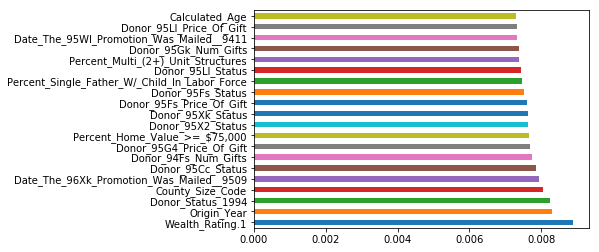

[0.008882139759245705, 0.008292512277207603, 0.00825766896119392, 0.008040235546714992, 0.007943878258683779, 0.00786858729862051, 0.007738789819353333, 0.007701956455158937, 0.007652492408775106, 0.00763262019381524, 0.007629947040070174, 0.00760982280515749, 0.007516140205770151, 0.0074645361718295835, 0.007437519324505655, 0.007382108827801803, 0.0073722024766857365, 0.007331346367550569, 0.007321766929335257, 0.007296845807766067]


In [60]:
#another feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_traindata,y_traindata)
dfscores = model.feature_importances_
dfcolumns = pd.DataFrame(X_traindata.columns)
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_traindata.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
print(list(feat_importances.nlargest(20)))



In [61]:
imporatant_features_select = list(feat_importances.nlargest(20).index)
print(len(imporatant_features_select))

20


In [62]:
imporatant_features_select_15 = list(feat_importances.nlargest(15).index)
print(len(imporatant_features_select_15))

15


In [69]:
X_traindata_feats = X_traindata[imporatant_features_select]
y_traindata_feats = y_traindata
print(X_traindata_feats.shape)
print(y_traindata_feats.shape)
X_testdata_feats = X_testdata[imporatant_features_select]
y_testdata_feats = y_testdata

(181138, 20)
(181138,)


In [64]:
X_traindata_feats_100 = X_traindata[imporatant_features_select_15]
y_traindata_feats_100 = y_traindata
print(X_traindata_feats_100.shape)
print(y_traindata_feats_100.shape)
X_testdata_feats_100 = X_testdata[imporatant_features_select_15]
y_testdata_feats_100 = y_testdata

(181138, 15)
(181138,)


In [50]:
#bristol_test_removedD = bristol_test[imporatant_features_select]
#print(bristol_test_removedD.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets
#X_testdata_feats = bristol_test_removedD.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
#y_testdata_feats = bristol_test_removedD['Target_B']

(86526, 21)


In [65]:
#logistic regression using penalities. finding optimal c parameter
cspace = np.logspace(-4,5,num=10) #from 10^-4 to 10^5 and 19 values in between
np_arrayaccval = []
np_arrayf1val = []
for c in range(len(cspace)):
    lr = LogisticRegression(max_iter = 200,C=cspace[c]) 
    X_train, X_test, y_train, y_test = train_test_split(X_traindata_feats, y_traindata_feats, test_size=0.25)
    lr.fit(X_train,y_train)
    y_skfpredict = lr.predict(X_test)
    y_skfpredict1 = lr.predict(X_train)
    #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
    np_arrayaccval.append(accuracy_score(y_test,y_skfpredict))#accuracy
    np_arrayf1val.append(f1_score(y_test,y_skfpredict))
    print(np_arrayf1val[c],np_arrayaccval[c])

0.5136212624584718 0.515071215634316
0.522896790980052 0.5140995914762062
0.5195359265144425 0.5125759081373523
0.5133521276831894 0.5158882632218174
0.5227262823026976 0.516307828199183
0.5243337702053298 0.5191343712045932
0.5202139787775147 0.5167494755437783
0.5064812738282126 0.5140554267417468
0.5209959769490051 0.5135916970299216
0.5186046511627906 0.5154686982444519


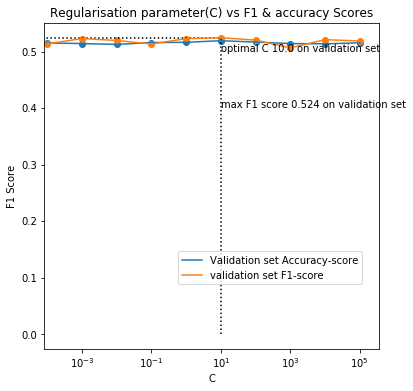

10.0 0.5243337702053298


In [66]:
#graph representaion
f1train_mean = np_arrayaccval #mean for each reguralisation parameter
f1val_mean = np_arrayf1val
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plt.xscale('log')
plt.plot(cspace,f1train_mean,label='Validation set Accuracy-score')
plt.scatter(cspace,f1train_mean)
plt.plot(cspace,f1val_mean,label='validation set F1-score')
plt.scatter(cspace,f1val_mean)
plt.legend(bbox_to_anchor=(0.4, 0.3), loc='upper left', borderaxespad=0.)
plt.xlim(-5.5,)
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('Regularisation parameter(C) vs F1 & accuracy Scores')
max_mean = max(list(f1val_mean))
index = list(f1val_mean).index(max_mean)
c_value = list(cspace)[index]
plt.vlines(c_value,0,max_mean,linestyle=":")
plt.hlines(max_mean,0,c_value,linestyle=":")
plt.annotate('optimal C {} on validation set'.format(c_value),xy=(c_value,0.5))
plt.annotate('max F1 score {:.3f} on validation set'.format(max_mean),xy=(c_value,0.4))
plt.show()
print(c_value,max_mean)
#print(f1val_mean)

In [55]:
#for col in X_testdata_feats:
 #   if len(X_testdata_feats.loc[X_testdata_feats[col].isna()]) != 0:
  #      X_testdata_feats[col].fillna(X_testdata_feats[col].mode().iloc[0],inplace=True)
#print(X_traindata_feats.shape)

(181138, 20)


In [70]:
lr1 = LogisticRegression(max_iter = 200,C=c_value) 
lr1.fit(X_traindata_feats,y_traindata_feats)
y_predicted = lr1.predict(X_testdata_feats)
print("Accuracy score of logistic regression with 20 important features")
print(accuracy_score(y_testdata_feats,y_predicted))
print("Precision score of logistic regression with 20 important features")
print(precision_score(y_testdata_feats,y_predicted))
print("Recall score of logistic regression with 20 important features")
print(recall_score(y_testdata_feats,y_predicted))
print("f1 score of logistic regression with 20 important features")
print(f1_score(y_testdata_feats,y_predicted))
print("confusion matrix logistic regression with 20 important features")
print(confusion_matrix(y_testdata_feats,y_predicted))

Accuracy score of logistic regression with 20 important features
0.528095601322146
Precision score of logistic regression with 20 important features
0.05423720520598885
Recall score of logistic regression with 20 important features
0.50501138952164
f1 score of logistic regression with 20 important features
0.09795431449653161
confusion matrix logistic regression with 20 important features
[[43477 38659]
 [ 2173  2217]]


In [71]:
et = [0.1,0.2,0.3]
xg_f1 = []
xg_acc = []
for rate in et:
    X_train, X_test, y_train, y_test = train_test_split(X_traindata_feats, y_traindata_feats, test_size=0.3)
    xg = XGBClassifier(eta=rate,max_depth=3,objective='binary:logistic',n_jobs=1)
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    test_predictions = [round(value) for value in y_skfpredict]
    xg_f1.append(f1_score(y_test,test_predictions))
    xg_acc.append(accuracy_score(y_test,test_predictions))
max_et = et[xg_f1.index(max(xg_f1))]
print("xgb classifier with maximum f1 value and learning rate")
print(max(xg_f1),max_et)

xgb classifier with maximum f1 value and learning rate
0.6199126731712576 0.3


In [66]:
#finding optimal depth at optimal rate
depth = [2,3,5,8,10,12]
xg_f1 = []
xg_acc = []
for val in depth:
    X_train, X_test, y_train, y_test = train_test_split(X_traindata_feats, y_traindata_feats, test_size=0.3)
    xg = XGBClassifier(eta=max_et,max_depth=val,objective='binary:logistic',n_jobs=1)
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    test_predictions = [round(value) for value in y_skfpredict]
    xg_f1.append(f1_score(y_test,test_predictions))
    xg_acc.append(accuracy_score(y_test,test_predictions))
max_depth = depth[xg_f1.index(max(xg_f1))]
print("Xb classifier optimal f1 score for validation and optimal depth at learning rate 0.3 is")
print(max(xg_f1),max_depth)

Xb classifier optimal f1 score for validation and optimal depth at learning rate 0.3 is
0.9983726160653879 12


In [72]:
#not using above depth 12. using max depth 2 below
xg = XGBClassifier(eta=max_et,max_depth=2,objective='binary:logistic',n_jobs=1)
xg.fit(X_traindata_feats,y_traindata_feats)
y_skfpredict = xg.predict(X_testdata_feats)
test_predictions = [round(value) for value in y_skfpredict]

In [73]:
print("Xb classifier 20 features optimal accuracy score for test dataset at optimal depth 2 and at learning rate 0.3 is")
print(accuracy_score(y_testdata_feats,test_predictions))
print("Xb classifier 20 features  optimal f1 score for test dataset at optimal depth 2 and at learning rate 0.3 is")
print(f1_score(y_testdata_feats,test_predictions))
print("Xb classifier 20 features  optimal precision score for test dataset at optimal depth 2 and at learning rate 0.3 is")
print(precision_score(y_testdata_feats,test_predictions))
print("Xb classifier 20 features  optimal recall score for test dataset at optimal depth 2 and at learning rate 0.3 is")
print(recall_score(y_testdata_feats,test_predictions))
print("Xb classifier 20 features confusion matrix for test dataset at optimal depth 2 and at learning rate 0.3 is")
print(confusion_matrix(y_testdata_feats,test_predictions))

Xb classifier 20 features optimal accuracy score for test dataset at optimal depth 2 and at learning rate 0.3 is
0.5524928923098259
Xb classifier 20 features  optimal f1 score for test dataset at optimal depth 2 and at learning rate 0.3 is
0.09252618997398579
Xb classifier 20 features  optimal precision score for test dataset at optimal depth 2 and at learning rate 0.3 is
0.051568745265027825
Xb classifier 20 features  optimal recall score for test dataset at optimal depth 2 and at learning rate 0.3 is
0.4496583143507973
Xb classifier 20 features confusion matrix for test dataset at optimal depth 2 and at learning rate 0.3 is
[[45831 36305]
 [ 2416  1974]]


In [77]:
np_arrayaccval = []
np_arrayf1val = []
depth_vals = [2, 4, 8, 16, 32, 64]
for depth in range(len(depth_vals)):
    X_train, X_test, y_train, y_test = train_test_split(X_traindata_feats, y_traindata_feats, test_size=0.25)
    lr = RandomForestClassifier(n_estimators = 500, max_depth = depth_vals[depth], n_jobs = -1) 
    lr.fit(X_train,y_train)
    y_skfpredict = lr.predict(X_test)
    #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
    np_arrayaccval.append(accuracy_score(y_test,y_skfpredict))#accuracy
    np_arrayf1val.append(f1_score(y_test,y_skfpredict))
    print(np_arrayf1val[depth],np_arrayaccval[depth])
max_depth = depth_vals[np_arrayf1val.index(max(np_arrayf1val))]
print(max(np_arrayf1val),np_arrayf1val.index(max(np_arrayf1val)))

0.5043522081729889 0.5221817378823009
0.5529782554474751 0.564646130065143
0.8005933824952164 0.7951860439439108
0.9999342782658226 0.9999337528983107


KeyboardInterrupt: 

In [78]:
lr = RandomForestClassifier(n_estimators = 500, max_depth = 2, n_jobs = -1) 
lr.fit(X_traindata_feats,y_traindata_feats)
y_predict = lr.predict(X_testdata_feats)
print(accuracy_score(y_testdata_feats,y_predict))
print(f1_score(y_testdata_feats,y_predict))
print(precision_score(y_testdata_feats,y_predict))
print(recall_score(y_testdata_feats,y_predict))
print(confusion_matrix(y_testdata_feats,y_predict))
print(f1_score(y_testdata_feats,y_predict))
pd.crosstab(y_testdata_feats, y_predict, rownames = ['actual'], colnames = ['preds'])

0.5321868571296489
0.09940817870333288
0.05508432784298254
0.508883826879271
[[43814 38322]
 [ 2156  2234]]
0.09940817870333288


preds,0,1
actual,,
0,43814,38322
1,2156,2234


In [79]:
lr = RandomForestClassifier(n_estimators = 500, max_depth = 4, n_jobs = -1) 
lr.fit(X_traindata_feats,y_traindata_feats)
y_predict = lr.predict(X_testdata_feats)
print(accuracy_score(y_testdata_feats,y_predict))
print(f1_score(y_testdata_feats,y_predict))
print(precision_score(y_testdata_feats,y_predict))
print(recall_score(y_testdata_feats,y_predict))
print(confusion_matrix(y_testdata_feats,y_predict))
print(f1_score(y_testdata_feats,y_predict))
pd.crosstab(y_testdata_feats, y_predict, rownames = ['actual'], colnames = ['preds'])

0.5675635069227747
0.09927541465058617
0.05550321660251407
0.4697038724373576
[[47047 35089]
 [ 2328  2062]]
0.09927541465058617


preds,0,1
actual,,
0,47047,35089
1,2328,2062


In [75]:
#logistic regression using penalities for 15 first features
cspace = np.logspace(-4,5,num=10) #from 10^-4 to 10^5 and 19 values in between
np_arrayaccval = []
np_arrayf1val = []
for c in range(len(cspace)):
    lr = LogisticRegression(max_iter = 200,C=cspace[c]) 
    X_train, X_test, y_train, y_test = train_test_split(X_traindata_feats_100, y_traindata_feats_100, test_size=0.25)
    lr.fit(X_train,y_train)
    y_skfpredict = lr.predict(X_test)
    y_skfpredict1 = lr.predict(X_train)
    #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
    np_arrayaccval.append(accuracy_score(y_test,y_skfpredict))#accuracy
    np_arrayf1val.append(f1_score(y_test,y_skfpredict))
    print(np_arrayf1val[c],np_arrayaccval[c])

0.496796830786644 0.5091310588495087
0.5117680953858428 0.5135254499282323
0.5119236883942767 0.5118913547532296
0.5267450435989762 0.5182069117809429
0.5034282759705955 0.512222590261676
0.5082328825115305 0.5126200728718119
0.504567027849915 0.5113172132052556
0.5067840937031987 0.5127525670751905
0.5007874724384647 0.5100364359059291
0.4946139018029255 0.5078944462846418


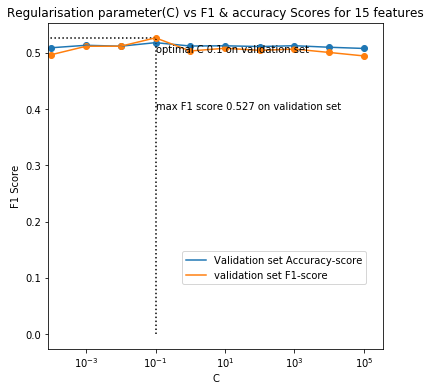

0.1 0.5267450435989762


In [76]:
#graph representaion
f1train_mean = np_arrayaccval #mean for each reguralisation parameter
f1val_mean = np_arrayf1val
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plt.xscale('log')
plt.plot(cspace,f1train_mean,label='Validation set Accuracy-score')
plt.scatter(cspace,f1train_mean)
plt.plot(cspace,f1val_mean,label='validation set F1-score')
plt.scatter(cspace,f1val_mean)
plt.legend(bbox_to_anchor=(0.4, 0.3), loc='upper left', borderaxespad=0.)
plt.xlim(-5.5,)
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('Regularisation parameter(C) vs F1 & accuracy Scores for 15 features')
max_mean = max(list(f1val_mean))
index = list(f1val_mean).index(max_mean)
c_value = list(cspace)[index]
plt.vlines(c_value,0,max_mean,linestyle=":")
plt.hlines(max_mean,0,c_value,linestyle=":")
plt.annotate('optimal C {} on validation set'.format(c_value),xy=(c_value,0.5))
plt.annotate('max F1 score {:.3f} on validation set'.format(max_mean),xy=(c_value,0.4))
plt.show()
print(c_value,max_mean)
#print(f1val_mean)

In [77]:
for col in X_testdata_feats_100:
    if len(X_testdata_feats_100.loc[X_testdata_feats_100[col].isna()]) != 0:
        if str(X_testdata_feats_100[col].dtypes) == 'int64' or str(X_testdata_feats_100[col].dtypes) == 'float64':
            X_testdata_feats_100[col].fillna(X_testdata_feats_100[col].mean(skipna=True),inplace=True)

In [78]:
lr1 = LogisticRegression(max_iter = 200,C=c_value) 
lr1.fit(X_traindata_feats_100,y_traindata_feats_100)
y_predicted = lr1.predict(X_testdata_feats_100)

In [79]:
print("Accuracy score of logistic regression with 15 important features")
print(accuracy_score(y_testdata_feats_100,y_predicted))
print("Precision score of logistic regression with 15 important features")
print(precision_score(y_testdata_feats_100,y_predicted))
print("Recall score of logistic regression with 15 important features")
print(recall_score(y_testdata_feats_100,y_predicted))
print("f1 score of logistic regression with 15 important features")
print(f1_score(y_testdata_feats_100,y_predicted))
print("confusion matrix logistic regression with 15 important features")
print(confusion_matrix(y_testdata_feats_100,y_predicted))

Accuracy score of logistic regression with 15 important features
0.5424727827473823
Precision score of logistic regression with 15 important features
0.0543428716130666
Recall score of logistic regression with 15 important features
0.4888382687927107
f1 score of logistic regression with 15 important features
0.09781221513217868
confusion matrix logistic regression with 15 important features
[[44792 37344]
 [ 2244  2146]]


In [18]:
#feature selection for prediction
unwanted_cols_regress = []
bristol_removedB = bristol.drop('Target_B',axis=1)
bristol_dat = bristol_removedB.var()
unwanted_cols_regress.extend(bristol_dat.index[bristol_dat < 0.001])
#remove columns which are mostly sparse i.e columns that contain less than 1 % of total data
unwanted_cols_regress.extend(bristol.columns[bristol.count() < int(bristol.shape[0] * 0.01)])
bristol_preprocessed_regress = bristol.drop(unwanted_cols_regress,axis=1)
#bristol_test_preprocessed = bristol.drop(unwanted_cols,axis=1)
#imputation of mean values for int and float and for object mode values
for col in bristol_preprocessed_regress:
    if len(bristol_preprocessed_regress.loc[bristol_preprocessed_regress[col].isna()]) != 0:
        if str(bristol_preprocessed_regress[col].dtypes) == 'int64' or str(bristol_preprocessed_regress[col].dtypes) == 'float64':
            bristol_preprocessed_regress[col].fillna(bristol_preprocessed_regress[col].mean(skipna=True),inplace=True)
        elif str(bristol_preprocessed_regress[col].dtypes) == 'object':
            bristol_preprocessed_regress[col].fillna(bristol_preprocessed_regress[col].mode().iloc[0],inplace=True)
print(unwanted_cols_regress)

['Donor_97Nk_Status', 'Donor_Status_1997', 'Donor_Title__ARMY', 'Donor_Title__GOVER', 'Donor_Title__RELIGIOUS', 'State__0', 'State__Armed_Forces_Africa', 'State__Armed_Forces_Americas', 'State__Armed_Forces_Pacific', 'State__Connecticut', 'State__Delaware', 'State__District_of_Columbia', 'State__Maine', 'State__Maryland', 'State__Massachusetts', 'State__New_Hampshire', 'State__New_Jersey', 'State__New_York', 'State__Ohio', 'State__Pennsylvania', 'State__Rhode_Island', 'State__Vermont', 'State__Virginia', 'State__West_Virginia', 'DOB_Year__1900', 'Recency Of Giving__DormantDonor', 'Recency Of Giving__InactiveDonor', 'Recency Of Giving__LapsedDonor', 'Frequency Of Giving__2to4_gifts', 'Frequency Of Giving__5+_gifts', 'Amount Of Giving__LessDonor', 'Amount Of Giving__MajorDoner_5+', 'Amount Of Giving__TopDonor_1+', 'EPVA/PVA_Northeastern_US__EPVA_StateVA_State_Northeastern_US', 'Age_Flag__I', 'Children_0-3__Child_BothGenders', 'Date_The_97Nk_Promotion_Was_Mailed__9704', 'Date_The_97Nk_Pro

In [19]:
print(len(unwanted_cols_regress))

465


In [20]:
#feature selection based on corelation i.e higher correlated variables shows most impact on the data by balancing the dataset.
#so postive and correlated values which are higher than 0.01 are considered
#to do that categorical values are changed to ordinal
bristol_preprocessed_regress.apply(np.random.permutation)        #shuffling data to ensure data has no predefined order
positive_labels = bristol_preprocessed_regress['Target_D'] >0  #postive labels
positive_examples = bristol_preprocessed_regress[positive_labels] #positive rows
negative_examples = bristol_preprocessed_regress[bristol_preprocessed_regress['Target_D'] == 0][:sum(positive_labels)] #equal number of negative rows for balancing
subset_data = positive_examples.append(negative_examples,ignore_index=True)
#changed_data = pd.get_dummies(subset_data) #changing categorical values
changed_data_corr_regress = subset_data.corr()['Target_D'].copy() #coorelation
#print(changed_data.describe())

In [21]:
positive_correlation = changed_data_corr_regress.loc[changed_data_corr_regress >= 0.01].index
negative_correlation = changed_data_corr_regress.loc[changed_data_corr_regress <=-0.01].index
print(pd.DataFrame(changed_data_corr_regress).sort_values('Target_D'))
imporatant_features_regress = list(set(positive_correlation.append(negative_correlation)))
print(len(imporatant_features_regress))

                                                  Target_D
Percent_Scottish_Ancestry                        -0.027719
Calculated_Age                                   -0.027431
Culinary_Pubs                                    -0.026099
Date_The_Gift_Was_Received_For_95Nk__9507        -0.024848
Donor_95Gk_Status                                -0.023069
Percent_Children_Age_16-18                       -0.022707
Date_The_96X1_Promotion_Was_Mailed__9510         -0.022657
Donor_96G4_Price_Of_Gift                         -0.022474
Percent_Multi_(2+)_Unit_Structures               -0.022050
Date_Of_Second_Gift__9110                        -0.021869
Percent_Employed_By_Local_Government             -0.021652
State__Oklahoma                                  -0.020620
Date_The_Gift_Was_Received_For_95Cc__9501        -0.020555
Date_Of_First_Gift__9412                         -0.020322
Donor_96Cc_Price_Of_Gift                         -0.019494
Lifetime_Number_Of_Promotions_Received_To_Date   -0.0194

In [22]:
#getting data from important features
bristol_changeddata_regress = bristol_preprocessed_regress[imporatant_features_regress]
#bristol_changeddata = pd.get_dummies(bristol_preprocessed)[imporatant_features]
print(bristol_changeddata_regress.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets

#upsampling
"""
from sklearn.utils import resample
not_donated = bristol_changeddata_regress[bristol_changeddata_regress.Target_D==0]
donated = bristol_changeddata_regress[bristol_changeddata_regress.Target_D>1]

# upsample minority
donated_upsampled = resample(donated,
                          replace=True, # sample with replacement
                          n_samples=len(not_donated), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
bristol_changeddata_regress = pd.concat([not_donated, donated_upsampled])"""

X_traindata_regress = bristol_changeddata_regress.drop('Target_D',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_traindata_regress = bristol_changeddata_regress['Target_D']
print(bristol_changeddata_regress.shape)

(95412, 287)
(95412, 287)


In [23]:
bristol_test_removedB = bristol_test[imporatant_features_regress]
print(bristol_test_removedB.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets
X_testdata_regress = bristol_test_removedB.drop('Target_D',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_testdata_regress = bristol_test_removedB['Target_D']
print(X_testdata_regress.shape)
print(y_testdata_regress.shape)

(86526, 287)
(86526, 286)
(86526,)


In [24]:
y_mean = y_testdata_regress.mean()
#training
#y_train_baseline = np.array([y_mean]*y_train.shape[0])
#print("baseline training rmse error:  "+str(np.sqrt(mean_squared_error(y_train,y_train_baseline))))
#validation
y_val_baseline = np.array([y_mean]*y_testdata_regress.shape[0])
print("baseline test rmse error:  "+str(np.sqrt(mean_squared_error(y_testdata_regress,y_val_baseline))))
sum1 = 0
for val in y_val_baseline:
    sum1 += (val-0.68)
print(sum1)

baseline test rmse error:  4.7102927631500116
9186.459999991763


In [25]:
for col in X_testdata_regress:
    if len(X_testdata_regress.loc[X_testdata_regress[col].isna()]) != 0:
        X_testdata_regress[col].fillna(X_testdata_regress[col].mode().iloc[0],inplace=True)
print(X_testdata_regress.shape)

(86526, 286)


In [26]:
#usinng directly linear regression
lr = LinearRegression()
lr.fit(X_traindata_regress,y_traindata_regress)#important features selected directly related to target d
y_trainpredict = lr.predict(X_traindata_regress)
y_valpredict = lr.predict(X_testdata_regress)
#training rmse error
print("training rmse error:  "+str(np.sqrt(mean_squared_error(y_traindata_regress,y_trainpredict))))
#validation rmse error
print("test rmse error:  "+str(np.sqrt(mean_squared_error(y_testdata_regress,y_valpredict))))

training rmse error:  4.416462376612502
test rmse error:  4.714751449853198


In [122]:
sum_donation = 0
#for val in y_trainpredict:
 #   sum_donation += (val-0.68)
for val in y_valpredict:
    sum_donation += (val-0.68)
print("profit using only linear regression:-")
print(sum_donation)

profit:-
10467.944123816987


In [85]:
#getting data from important features
imporatant_features_regress_upsample= imporatant_features_regress
if "Target_B" not in imporatant_features_regress_upsample:
    imporatant_features_regress_upsample.append("Target_B")
if "Target_D" not in imporatant_features_regress_upsample:
    imporatant_features_regress_upsample.append("Target_D")
bristol_changeddata_regress_upsample = bristol_preprocessed[imporatant_features_regress_upsample]
#bristol_changeddata = pd.get_dummies(bristol_preprocessed)[imporatant_features]
#print(bristol_changeddata.describe())
#splitting data according to labels and targets

#upsampling
from sklearn.utils import resample
not_donated = bristol_changeddata_regress_upsample[bristol_changeddata_regress_upsample.Target_B==0]
donated = bristol_changeddata_regress_upsample[bristol_changeddata_regress_upsample.Target_B==1]

# upsample minority
donated_upsampled = resample(donated,
                          replace=True, # sample with replacement
                          n_samples=len(not_donated), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
bristol_changeddata_regress_upsample = pd.concat([not_donated, donated_upsampled])



(181138, 289)


In [ ]:
X_traindata_regress_upsample = bristol_changeddata_regress_upsample.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_traindata_regress_upsample = bristol_changeddata_regress_upsample['Target_B']
print(bristol_changeddata_regress_upsample.shape)

In [109]:
X_traindata_regress_logic = bristol_changeddata_regress_upsample.drop(['Target_B','Target_D'],axis=1)
y_traindata_regress_logic = bristol_changeddata_regress_upsample.drop('Target_D',axis=1)['Target_B']
y_traindata_regress_linear = bristol_changeddata_regress_upsample.drop('Target_B',axis=1)['Target_D']

In [112]:
print(X_traindata_regress_logic.shape)
print(y_traindata_regress_logic.shape)
print(y_traindata_regress_linear.shape)
print(y_traindata_regress_linear.iloc[:,0])

(181138, 286)
(181138,)
(181138, 2)
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
12        0.0
13       15.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        5.0
28        0.0
29        0.0
30        0.0
31        0.0
         ... 
91452     0.0
89374     0.0
78919     0.0
13759     0.0
41560     0.0
82778     0.0
60654     0.0
9021      0.0
86994     0.0
18873     0.0
5525      0.0
64583     0.0
91035     0.0
18235     0.0
32569     0.0
79881     0.0
17722     0.0
57136     0.0
14650     0.0
18427     0.0
23694     0.0
45069     0.0
27155     0.0
59035     0.0
59391     0.0
67976     0.0
17795     0.0
21690     0.0
45981     2.0
71642     0.0
Name: Target_D, Length: 181138, dtype: float64


In [113]:
#using logistic regression and linear regression
logic = LogisticRegression(max_iter = 200)
logic.fit(X_traindata_regress_logic,y_traindata_regress_logic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
y_val_predict_logic = logic.predict(X_traindata_regress_logic)
linear = LinearRegression()
y_traindata_regress_linear = y_traindata_regress_linear.iloc[:,0]
linear.fit(X_traindata_regress_logic[y_val_predict_logic == 1],y_traindata_regress_linear[y_val_predict_logic==1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
print(len(y_val_predict_logic[y_val_predict_logic==1]))

90440


In [118]:
y_val_predict_linear = linear.predict(X_testdata_regress)

In [119]:
print(y_traindata_regress_linear.shape)

(181138,)


In [120]:
#dont use logistic regression and linear regression. giving less proft
sum_donation_logic = 0
#for val in y_trainpredict:
 #   sum_donation += (val-0.68)
for val in y_val_predict_linear:
    sum_donation_logic += (val-0.68)
print(sum_donation_logic)
print(len(y_val_predict_linear[y_val_predict_linear < 0.0]))
print(len(y_val_predict_linear[y_val_predict_linear > 0.68]))
print(min(y_val_predict_linear),max(y_val_predict_linear))

8263.36246938284
12470
46612
-4.778525048740761 23.720417870863795
